In [2]:
import scipy.stats as stats
# Sample data (accuracy scores of a model)
sample_data = [0.85, 0.88, 0.90, 0.87, 0.86]
population_mean = 0.89

In [4]:
# Perform t-test
t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -2.0924574973887338, P-value: 0.10453999977837701
Fail to reject the null hypothesis


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression (without regularization)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print coefficients
print("Linear Regression Coefficients (No Regularization):")
print(lr.coef_)


Linear Regression Coefficients (No Regularization):
[61.52208912 98.47253675 61.09969936 55.54150072 35.97411246]


In [10]:
from sklearn.linear_model import Ridge

# Apply Ridge Regression
ridge = Ridge(alpha=10)  # Alpha controls shrinkage strength
ridge.fit(X_train, y_train)

# Print coefficients
print("Ridge Regression Coefficients:")
print(ridge.coef_)


Ridge Regression Coefficients:
[55.10088209 85.31251794 50.49159256 49.19476305 33.30191161]


In [11]:
from sklearn.linear_model import Lasso

# Apply Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Print coefficients
print("Lasso Regression Coefficients:")
print(lasso.coef_)


Lasso Regression Coefficients:
[60.68323055 97.22274182 59.46118229 54.52296615 35.13380233]


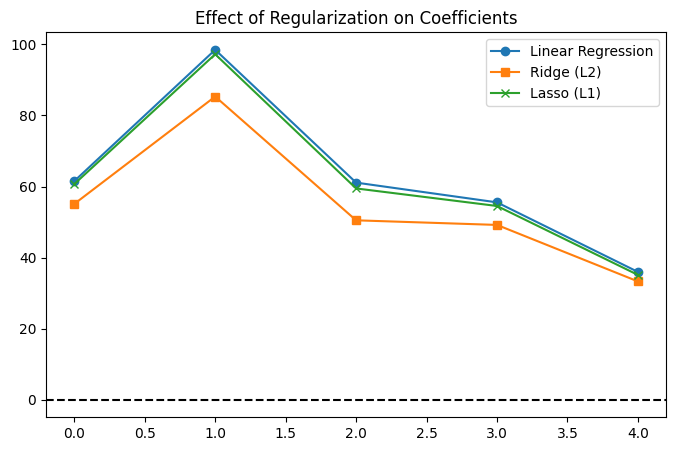

In [12]:
import matplotlib.pyplot as plt

# Compare coefficients
plt.figure(figsize=(8,5))
plt.plot(lr.coef_, marker='o', label="Linear Regression")
plt.plot(ridge.coef_, marker='s', label="Ridge (L2)")
plt.plot(lasso.coef_, marker='x', label="Lasso (L1)")
plt.axhline(y=0, color='black', linestyle="--")
plt.legend()
plt.title("Effect of Regularization on Coefficients")
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sample actual and predicted values
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


MAE: 0.500, MSE: 0.375, RMSE: 0.612, R²: 0.949


In [4]:
#✅ Concept 1: Anagram Checking
from collections import Counter

def anagram(s:str,t:str) ->bool:
    return Counter(s)==Counter(t)

anagram('rat','tar')


True

In [8]:
# manual approach
s = 'rat'
t = 'tar'

count={}
for char in s:
    count[char] = count.get(char,0)+1

for char in t:
    if char not in count:
        print('Not an anagram')
        break
    count[char] -=1
    if count[char]==0:
        del count[char]

if len(count)==0:
    print('anagram')
        






anagram


In [17]:
# Concepts: Two Pointers, String Filtering, Alphanumeric Check
input = "A man, a plan, a canal: Panama"

cleaned_text = ''.join(char.lower() for char in input if char.isalnum())
if cleaned_text ==cleaned_text[::-1]:
    print('same')






same


In [15]:
cleaned_text[::-1]

'amanaPlanacanalpanamA'

In [27]:
# Longest Substring Without Repeating Characters
# Concepts: Sliding Window + HashSet (Important for Interviews!)
# Given a string s, find the length of the longest substring without repeating characters.
s = "abcabcbb"
from collections import Counter
intial_count = Counter(s)
print(intial_count)

starting =0



    
    
    






Counter({'b': 4, 'a': 2, 'c': 2})


In [ ]:
count = {}
left=0
k=0
for i in range(k,len(s)):
    count[s[i]] = count.get(s[i],0)+1
    # k+=1
    window = s[k::i+1]
    print(window)
    #window
    # print(count)
    # if count[s[i]]>=2:
    #     starting+=1
    #     # del count[s[i]]

len(count)

ValueError: slice step cannot be zero

In [45]:
s

'abcabcbb'

In [48]:
seen = set()
left = 0 
max_len = 0 

for right in range(len(s)):
    while s[right] in seen:
        seen.remove(s[left])
        left+=1
        
    seen.add(s[right])
    max_len = max(max_len,right-left+1)

In [50]:
def length_of_longest_substring(s: str) -> int:
    seen = set()             # store characters in current window
    left = 0                 # start of sliding window
    max_len = 0              # result

    print(f"Input String: '{s}'\n")

    for right in range(len(s)):
        print(f"Right Pointer at {right} → '{s[right]}'")

        # If character is already in window, move left to remove duplicates
        while s[right] in seen:
            print(f"  '{s[right]}' already seen. Shrinking window...")
            print(f"  Removing '{s[left]}' from window")
            seen.remove(s[left])
            left += 1
            print(f"  Window after shrinking: {s[left:right+1]}")

        # Add current character to window
        seen.add(s[right])
        print(f"  Added '{s[right]}' to window: {s[left:right+1]}")
        print(f"  Unique characters in window: {seen}")

        # Update maximum length found
        current_len = right - left + 1
        max_len = max(max_len, current_len)
        print(f"  Current max_len: {max_len}\n")

    print(f"Final Result → Longest Substring Length: {max_len}")
    return max_len

# Test
length_of_longest_substring("abcabcbb")


Input String: 'abcabcbb'

Right Pointer at 0 → 'a'
  Added 'a' to window: a
  Unique characters in window: {'a'}
  Current max_len: 1

Right Pointer at 1 → 'b'
  Added 'b' to window: ab
  Unique characters in window: {'b', 'a'}
  Current max_len: 2

Right Pointer at 2 → 'c'
  Added 'c' to window: abc
  Unique characters in window: {'b', 'c', 'a'}
  Current max_len: 3

Right Pointer at 3 → 'a'
  'a' already seen. Shrinking window...
  Removing 'a' from window
  Window after shrinking: bca
  Added 'a' to window: bca
  Unique characters in window: {'b', 'c', 'a'}
  Current max_len: 3

Right Pointer at 4 → 'b'
  'b' already seen. Shrinking window...
  Removing 'b' from window
  Window after shrinking: cab
  Added 'b' to window: cab
  Unique characters in window: {'b', 'c', 'a'}
  Current max_len: 3

Right Pointer at 5 → 'c'
  'c' already seen. Shrinking window...
  Removing 'c' from window
  Window after shrinking: abc
  Added 'c' to window: abc
  Unique characters in window: {'b', 'c', 'a

3

In [56]:
from collections import defaultdict
s,k= "eceba", 2
left = 0
max_len = 0
freq_map=defaultdict(int)
for right in range(len(s)):
    char = s[right]
    freq_map[char] +=1
    print(f"Right Pointer at {right} → '{char}' added, freq_map: {dict(freq_map)}")

    # Shrink window if more than k distinct characters
    while len(freq_map)>k:
        print(f"  More than {k} distinct characters. Shrinking window...")
        left_char = s[left]
        freq_map[left_char] -= 1
        print(f"  Decrementing '{left_char}', freq_map: {dict(freq_map)}")

        if freq_map[left_char]==0:
            del freq_map[left_char]
            print(f"  Removed '{left_char}' as its count is 0 → freq_map: {dict(freq_map)}")
        left += 1
        print(f"  Left pointer moved to {left}")
    max_len = max(max_len, right - left + 1)
    print(f"  Current max_len: {max_len}\n")



        




Right Pointer at 0 → 'e' added, freq_map: {'e': 1}
  Current max_len: 1

Right Pointer at 1 → 'c' added, freq_map: {'e': 1, 'c': 1}
  Current max_len: 2

Right Pointer at 2 → 'e' added, freq_map: {'e': 2, 'c': 1}
  Current max_len: 3

Right Pointer at 3 → 'b' added, freq_map: {'e': 2, 'c': 1, 'b': 1}
  More than 2 distinct characters. Shrinking window...
  Decrementing 'e', freq_map: {'e': 1, 'c': 1, 'b': 1}
  Left pointer moved to 1
  More than 2 distinct characters. Shrinking window...
  Decrementing 'c', freq_map: {'e': 1, 'c': 0, 'b': 1}
  Removed 'c' as its count is 0 → freq_map: {'e': 1, 'b': 1}
  Left pointer moved to 2
  Current max_len: 3

Right Pointer at 4 → 'a' added, freq_map: {'e': 1, 'b': 1, 'a': 1}
  More than 2 distinct characters. Shrinking window...
  Decrementing 'e', freq_map: {'e': 0, 'b': 1, 'a': 1}
  Removed 'e' as its count is 0 → freq_map: {'b': 1, 'a': 1}
  Left pointer moved to 3
  Current max_len: 3



In [72]:
sentences = [
    "listen to the silent sound",
    "enlist the tone",
    "stone and notes"
]

from collections import defaultdict

words=[]
for sentence in sentences:
    words.extend(sentence.lower().split())

anagram_dict = defaultdict(list)

for word in words:
    key = ''.join(sorted(word))
    anagram_dict[key].append(word)

result = [group for group in anagram_dict.values() if len(group)>1]
result

[['listen', 'silent', 'enlist'], ['the', 'the'], ['stone', 'notes']]

In [64]:
anagram_dict

defaultdict(list,
            {'eilnst': ['listen', 'silent', 'enlist'],
             'ot': ['to'],
             'eht': ['the', 'the'],
             'dnosu': ['sound'],
             'enot': ['tone'],
             'enost': ['stone', 'notes'],
             'adn': ['and']})

In [93]:
def anagram_group(sentances:list)->list:
    words=[]
    #flatten the input
    for sentence in sentances:
        words.extend(sentence.lower().split())
    #create dict
    anagram_dict = defaultdict(list)
    for word in words:
        key = ''.join(sorted(word.lower()))
        anagram_dict[key].append(word)
    
    #filter those where we have more then 1 combination
    result = [group for group in anagram_dict.values() if len(group)>1]
    return result





In [94]:
sentences = [
    "listen to the silent sound",
    "enlist the tone",
    "stone and notes"
]

anagram_group(sentences)

[['listen', 'silent', 'enlist'], ['the', 'the'], ['stone', 'notes']]

In [98]:
Input = "AI is the future. AI will rule the world!"
# Output: ['ai', 'future', 'is', 'rule', 'the', 'will', 'world']
def tokenization(input: str)->list:
    result =input.lower().split(',')
    return result
tokenization(Input)

['ai is the future. ai will rule the world!']

In [106]:
# Write a Python function to generate all bigrams (2-word combinations) from a sentence.
input = "Natural Language Processing is fun"
# result = []
# words = input.lower().split()

# for i in range(len(words)-1):
#     print(words[i],words[i+1])

def nGram(input):
    result =list()
    words = input.lower().split()
    for i in range(len(words)-1):
        result.append((words[i],words[i+1]))
    return result
nGram(input)


[('natural', 'language'),
 ('language', 'processing'),
 ('processing', 'is'),
 ('is', 'fun')]

In [108]:
# Given a list of sentences, count the frequency 
# of each word across all sentences, ignoring case and punctuations.
# from collections import Counter

# Counter(["Hello world", "Hello AI world!"])

input = ["Hello world", "Hello AI world!"]

words =[]
for i in input:
    words.append(i.lower().split())
    

In [111]:
# Counter(words)

In [122]:
# Write a function that returns all palindrome words from a given paragraph.
input ="Level up your skills. Noon is the best time to study."

words = input.lower().split()

print(words)
   
        

    

['level', 'up', 'your', 'skills.', 'noon', 'is', 'the', 'best', 'time', 'to', 'study.']


In [128]:
def find_palindromes(paragraph):
    words = paragraph.lower().split()
    cleaned_text = [ word.strip('.,!?') for word in words]
    for word in cleaned_text:
        if word == word[::-1]:
            print(word)

In [120]:
count

{'s': 1, 't': 1, 'u': 1, 'd': 1, 'y': 1, '.': 1}

In [129]:
input_text = "Level up your skills. Noon is the best time to study."
find_palindromes(input_text)

level
noon


In [138]:
Input = ["Hello world", "Hello AI world!"]
sentence = ' '.join(word for word in Input)
cleaned_word = sentence.strip('!').lower().split()
cleaned_word



['hello', 'world', 'hello', 'ai', 'world']

In [141]:
Counter(cleaned_word).items()

dict_items([('hello', 2), ('world', 2), ('ai', 1)])

In [146]:
# Given two sentences, calculate the Jaccard Similarity between them.
input = ["I love AI", "AI loves me"]
sentence = ' '.join(word.lower() for word in input)
sentence


'i love ai ai loves me'

In [154]:
text = "Hello, world!! How's everything?"

import string

translator = str.maketrans('','',string.punctuation)
text.translate(translator)

'Hello world Hows everything'

In [155]:
from collections import Counter
# Top 10 most frequent words excluding stopwords
stopwords = {'the', 'is', 'in', 'a', 'of', 'to', 'and'}
text = "AI is the future and the future is AI and innovation"
words = text.lower().split()
words = [word for word in words if word not in stopwords]
freq = Counter(words).most_common(10)
freq

[('ai', 2), ('future', 2), ('innovation', 1)]

In [156]:
from collections import Counter

stopwords = {'the', 'is', 'in', 'a', 'of', 'to', 'and'}

def top_words(text, n=10):
    words = text.lower().split()
    words = [w for w in words if w not in stopwords]
    freq = Counter(words)
    return freq.most_common(n)

text = "AI is the future and the future is AI and innovation"
print(top_words(text))


[('ai', 2), ('future', 2), ('innovation', 1)]


In [160]:
# 7. Cosine similarity without sklearn
input = "The AI conference was on 3.14. It was great!"

import string
input.strip(string.punctuation)


'The AI conference was on 3.14. It was great'

In [166]:
# Simulate that you have 100 "word embeddings" (random NumPy vectors, 300-dim each).
import numpy as np 
word_embedding = np.random.rand(100,300)

In [169]:
windows = []
for i in range(len(word_embedding)-5+1):
    window = word_embedding[i:i+5]
    windows.append(window)

In [171]:
word_embedding

array([[0.01970599, 0.42225738, 0.99230036, ..., 0.26580932, 0.86416637,
        0.82916654],
       [0.84384279, 0.58128677, 0.74317437, ..., 0.59869227, 0.62430165,
        0.52580024],
       [0.3902849 , 0.53463073, 0.19649879, ..., 0.50775224, 0.89170324,
        0.15974596],
       ...,
       [0.25300706, 0.56331592, 0.47261929, ..., 0.02157467, 0.49216696,
        0.62559417],
       [0.22105754, 0.1213926 , 0.61650667, ..., 0.50111301, 0.83962831,
        0.65102711],
       [0.16156717, 0.13855122, 0.66972451, ..., 0.19531567, 0.87705026,
        0.25172786]])

In [170]:
windows

[array([[0.01970599, 0.42225738, 0.99230036, ..., 0.26580932, 0.86416637,
         0.82916654],
        [0.84384279, 0.58128677, 0.74317437, ..., 0.59869227, 0.62430165,
         0.52580024],
        [0.3902849 , 0.53463073, 0.19649879, ..., 0.50775224, 0.89170324,
         0.15974596],
        [0.67541816, 0.9967537 , 0.29124092, ..., 0.60433022, 0.02586179,
         0.34955158],
        [0.07524011, 0.75482116, 0.76774395, ..., 0.96180378, 0.16744653,
         0.07133029]]),
 array([[0.84384279, 0.58128677, 0.74317437, ..., 0.59869227, 0.62430165,
         0.52580024],
        [0.3902849 , 0.53463073, 0.19649879, ..., 0.50775224, 0.89170324,
         0.15974596],
        [0.67541816, 0.9967537 , 0.29124092, ..., 0.60433022, 0.02586179,
         0.34955158],
        [0.07524011, 0.75482116, 0.76774395, ..., 0.96180378, 0.16744653,
         0.07133029],
        [0.10335896, 0.42800573, 0.41255044, ..., 0.24679343, 0.4943445 ,
         0.74016013]]),
 array([[0.3902849 , 0.53463073, 0.1